In [19]:
print('##### Logistic Regression on Wisconsin Breast Cancer Data #####')

print('----- Importing required libraries & modules-----')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

##### Logistic Regression on Wisconsin Breast Cancer Data #####
----- Importing required libraries & modules-----


In [20]:
print('----- Importing dataset -----')
data = pd.read_csv('bcwd.csv', header=None)

data.columns = ['sample_code_number','clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion',              'single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']
feature_columns = ['clump_thickness','uniformity_of_cell_size','uniformity_of_cell_shape','marginal_adhesion',              'single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses']



print ('Imported Rows, Columns - ', data.shape)
print ('Data Head :')
data.head()

----- Importing dataset -----
Imported Rows, Columns -  (699, 11)
Data Head :


,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


[Text(115.892307692, 206.568, 'X[1] <= 2.5\ngini = 0.461\nsamples = 443\nvalue = [283, 160]'),
 Text(64.3846153846, 184.824, 'X[7] <= 3.5\ngini = 0.065\nsamples = 268\nvalue = [259, 9]'),
 Text(51.5076923077, 163.08, 'X[4] <= 5.5\ngini = 0.023\nsamples = 262\nvalue = [259, 3]'),
 Text(25.7538461538, 141.336, 'X[0] <= 6.5\ngini = 0.008\nsamples = 259\nvalue = [258, 1]'),
 Text(12.8769230769, 119.592, 'gini = 0.0\nsamples = 256\nvalue = [256, 0]'),
 Text(38.6307692308, 119.592, 'X[7] <= 2.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(25.7538461538, 97.848, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(51.5076923077, 97.848, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(77.2615384615, 141.336, 'X[4] <= 8.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(64.3846153846, 119.592, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(90.1384615385, 119.592, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(77.2615384615, 163.08, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Tex

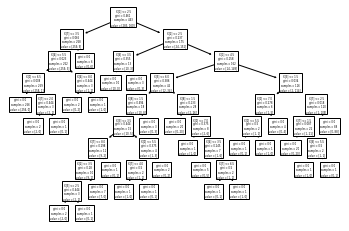

In [21]:
missingRemovedData =  data[data['bare_nuclei'] != '?'] # remove rows with missing data

X = missingRemovedData[feature_columns]
y = missingRemovedData['class']
y = (y-2)/2 #simplified

# split X and y into training and teting sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

#Implemnt C4.5 model
cdtModel = tree.DecisionTreeClassifier()
cdtModel = cdtModel.fit(X_train, y_train)

%matplotlib inline 
tree.plot_tree(cdtModel)


##### 

In [22]:
y_pred = cdtModel.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

from sklearn import metrics

print("Accuracy: ",  metrics.accuracy_score(y_test, y_pred)*100.0)


[[155   6]
 [  6  73]]
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       161
         1.0       0.92      0.92      0.92        79

    accuracy                           0.95       240
   macro avg       0.94      0.94      0.94       240
weighted avg       0.95      0.95      0.95       240

Accuracy:  95.0
